# Load packages

In [2]:
import pandas as pd
import numpy as np
from pandas import datetime
import os
import math
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
sns.set(color_codes=True)

# Load data

In [3]:
folder_path = './data/'

In [4]:
# read data
acorn_merge = pd.read_csv(folder_path + 'acorn_merge_cleaned.csv')
acorn_merge.head()

,LCLid,energy_sum,Acorn,electricity,recycle,water,adult,child,elderly,attitude,...,<20k,>100k,average_level,internet_high,internet_low,internet_med,not_tv,tv,attitude_per,environment_group_per
0,MAC000002,12.096094,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.0,...,0.01115,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,0.055359,0.084095
1,MAC000030,11.146685,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.0,...,0.01115,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,0.055359,0.084095
2,MAC000040,26.915465,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.0,...,0.01115,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,0.055359,0.084095
3,MAC000103,23.544304,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.0,...,0.01115,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,0.055359,0.084095
4,MAC000110,16.109455,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.0,...,0.01115,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,0.055359,0.084095


In [5]:
len(acorn_merge[acorn_merge.Acorn == 'ACORN-B'])

25

# Acorn group distribution

In [10]:
acorn_ratio = acorn_merge[['LCLid','energy_sum','Acorn','attitude']]
acorn_ratio = pd.DataFrame(acorn_ratio.groupby('Acorn').agg({'LCLid':'count',
                                                             'energy_sum':'mean',
                                                             'attitude':'mean'})).reset_index().rename(columns={'LCLid':'count'})
# acorn_ratio.loc[:,'ratio'] = acorn_ratio.loc[:,'ratio'] / acorn_ratio.loc[:,'ratio'].sum() * 100
acorn_ratio = acorn_ratio.sort_values('energy_sum',ascending=False)
acorn_ratio.head()

,Acorn,count,energy_sum,attitude
0,ACORN-A,150,17.069909,0.0
3,ACORN-D,290,13.489831,0.0
1,ACORN-B,25,12.359761,0.0
2,ACORN-C,150,12.040996,0.0
7,ACORN-H,454,11.133082,0.0


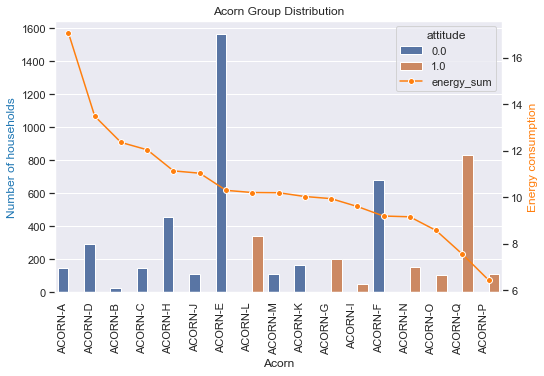

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()
acorn_ratio[['Acorn','energy_sum']].set_index('Acorn').plot(kind='line',
                                                            linestyle='-', marker='o', markeredgecolor='white',
                                                            color = 'tab:orange',
                                                            ax=ax2, grid=False);
# acorn_ratio[['Acorn','count']].set_index('Acorn').plot(kind='bar', color = 'tab:blue',ax=ax);
sns.barplot(x='Acorn', y='count', hue='attitude', data=acorn_ratio, ax=ax)

p1, labels1 = ax.get_legend_handles_labels()
p2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(p1 + p2, labels1 + labels2, loc = 0, title = 'attitude')
ax.get_legend().remove()
ax.set_ylabel('Number of households', color = 'tab:blue');
ax2.set_ylabel('Energy consumption', color = 'tab:orange');
ax.set_title('Acorn Group Distribution');
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha="right");

# EDA for housesize

In [6]:
# categories = {'ethnicity': ['white', 'mixed', 'asian', 'black', 'other_ethnicity'],
#               'house_size': ['bed_1', 'bed_2', 'bed_3', 'bed_4', 'bed_5']}
categories = {'ethnicity': ['white', 'mixed', 'asian', 'black', 'other_ethnicity'],
              'house_size': ['bed_1', 'bed_2', 'bed_3', 'bed_4']}

In [7]:
acorn_grouped = acorn_merge.drop('LCLid',axis=1).groupby('Acorn').mean().reset_index()
acorn_grouped.head()

,Acorn,energy_sum,electricity,recycle,water,adult,child,elderly,attitude,car_0,...,<20k,>100k,average_level,internet_high,internet_low,internet_med,not_tv,tv,attitude_per,environment_group_per
0,ACORN-A,17.069909,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.0,0.011593,...,0.011150,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,0.055359,0.084095
1,ACORN-B,12.359761,0.059651,0.063011,0.064790,0.051596,0.057692,0.067270,0.0,0.013105,...,0.017606,0.179169,0.094712,0.064831,0.031960,0.035387,0.058083,0.065398,0.054181,0.079220
2,ACORN-C,12.040996,0.061723,0.062427,0.063618,0.048461,0.047776,0.093213,0.0,0.012097,...,0.038146,0.070696,0.067984,0.059667,0.049423,0.048493,0.050072,0.055886,0.055359,0.078611
3,ACORN-D,13.489831,0.055062,0.062865,0.059513,0.071266,0.050781,0.031373,0.0,0.104839,...,0.025235,0.144091,0.085997,0.067699,0.018451,0.022280,0.077825,0.063020,0.057126,0.094455
4,ACORN-E,10.295482,0.058022,0.058926,0.061566,0.064282,0.064303,0.035596,0.0,0.059476,...,0.032277,0.082029,0.073213,0.065404,0.025041,0.036697,0.076109,0.067182,0.055948,0.082267


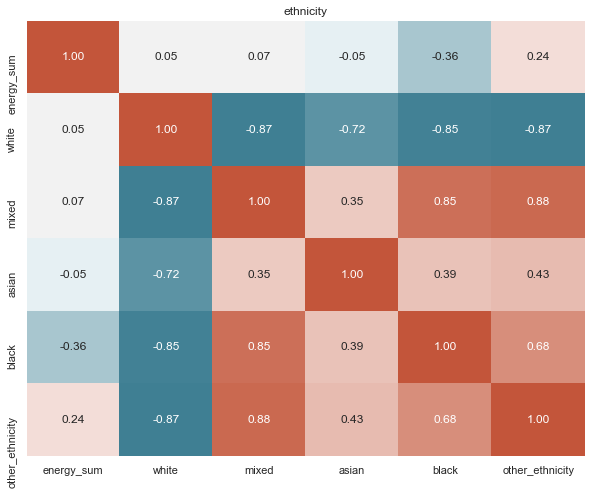

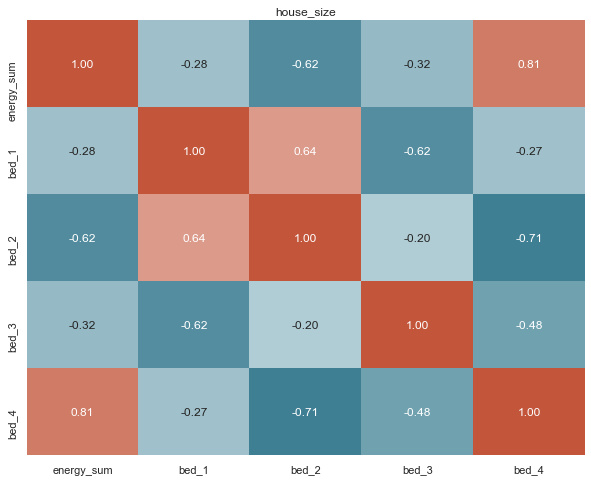

In [8]:
for key,value in categories.items():
    corr = acorn_grouped[['energy_sum'] + value].corr() 
    fig,ax=plt.subplots(figsize=(10,8))
    cm = sns.light_palette("green", as_cmap=True) 
    cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    sns.heatmap(corr, annot=True, fmt='.2f',cmap=cm, cbar=False, ax=ax);
    ax.set_title(key)

In [9]:
def plot_percentage(data,features):
    '''
    Code from Nandhitha.
    Plot lines for two features, x axis is Acorn group, y axis is feature value
    Args:
        data(df): the whole dataset or should at least have ['Acorn', 2 features want to plot]
        features(list): length=2. 2 features want to plot
    '''
    fig, ax1 = plt.subplots(figsize = (10,5))
    ax1.plot(data['Acorn'], data[features[0]],'-o', color = 'tab:orange')
    ax1.set_ylabel(features[0],color = 'tab:orange')
    ax2 = ax1.twinx()
    ax2.plot(data['Acorn'], data[features[1]],'-o',color = 'tab:blue')
    ax2.grid(False)
    ax2.set_ylabel(features[1],color = 'tab:blue')
    plt.title('{feature1} and {feature2}'.format(feature1=features[0],feature2=features[1]))
    fig.autofmt_xdate(rotation=45)
    fig.tight_layout()
    plt.show()

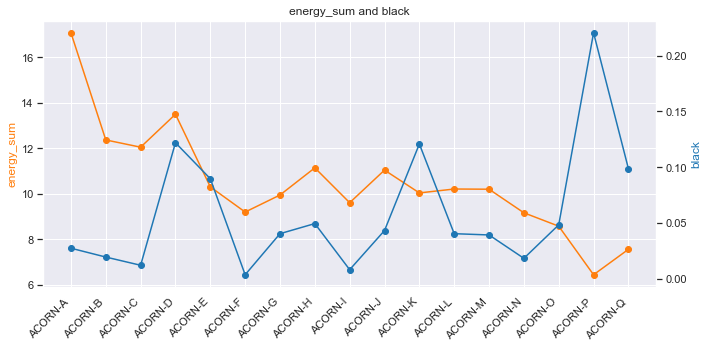

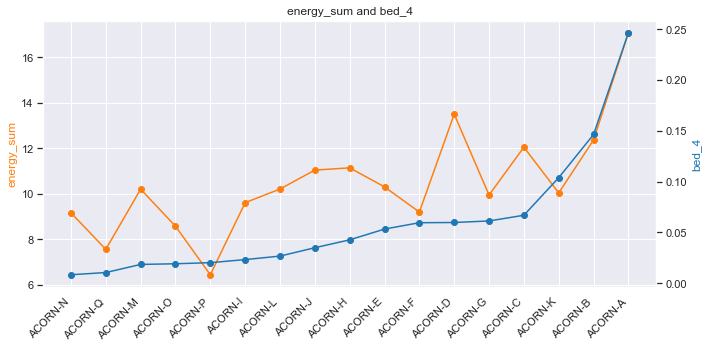

In [49]:
# plot_percentage(acorn_grouped,['attitude_per','<20k'])
plot_percentage(acorn_grouped,['energy_sum','black'])
plot_percentage(acorn_grouped.sort_values('bed_4'),['energy_sum','bed_4'])

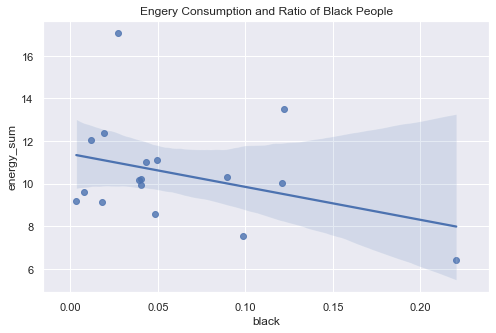

In [11]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.regplot(x='black', y='energy_sum', data=acorn_grouped);
# ax = sns.regplot(x='house_size', y='energy_sum', data=house_size[house_size.house_size<1]);
ax.set_title('Engery Consumption and Ratio of Black People');

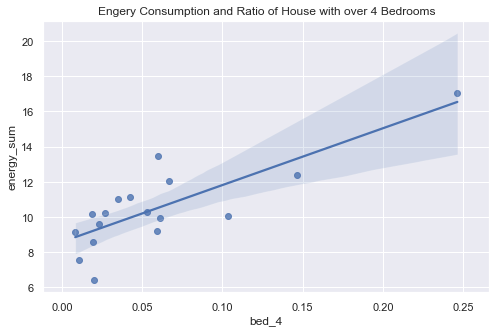

In [12]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.regplot(x='bed_4', y='energy_sum', data=acorn_grouped);
# ax = sns.regplot(x='house_size', y='energy_sum', data=house_size[house_size.house_size<1]);
ax.set_title('Engery Consumption and Ratio of House with over 4 Bedrooms');

In [13]:
house_size = acorn_grouped[['Acorn','energy_sum'] + categories['house_size']]
house_size.loc[:,'house_size'] = house_size.loc[:,'bed_1'] + 2 * house_size.loc[:,'bed_2'] + \
                                    3 * house_size.loc[:,'bed_3'] + 4 * house_size.loc[:,'bed_4']
house_size.head()

D:\Ananconda\install\envs\py3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Ananconda\install\envs\py3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Acorn,energy_sum,bed_1,bed_2,bed_3,bed_4,house_size
0,ACORN-A,17.069909,0.016138,0.016110,0.027796,0.246433,1.117478
1,ACORN-B,12.359761,0.012799,0.016706,0.045895,0.146347,0.769285
2,ACORN-C,12.040996,0.017807,0.042959,0.070459,0.066796,0.582289
3,ACORN-D,13.489831,0.124096,0.067422,0.038785,0.059663,0.613946
4,ACORN-E,10.295482,0.074012,0.073986,0.047188,0.053178,0.576259


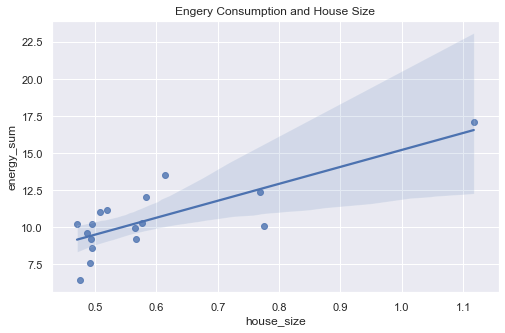

In [14]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.regplot(x='house_size', y='energy_sum', data=house_size);
# ax = sns.regplot(x='house_size', y='energy_sum', data=house_size[house_size.house_size<1]);
ax.set_title('Engery Consumption and House Size');

# Regression

In [15]:
weather = pd.read_csv(folder_path + 'weather_daily_darksky.csv')
weather.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [16]:
weather['day']=  pd.to_datetime(weather['time']) # day is given as timestamp
weather['day']=  pd.to_datetime(weather['day'],format='%Y-%m-%d').dt.date
weather['temperatureMean'] = (weather['temperatureMax'] + weather['temperatureMin'])/2

# selecting numeric variables
weather_features = ['temperatureMean',
                    'windBearing', 'windSpeed', 'dewPoint', 
                   'pressure', 'cloudCover','humidity',
                    'visibility', 'uvIndex',
                    'day'
                   ]
weather = weather[weather_features].dropna()


weather.head()

,temperatureMean,windBearing,windSpeed,dewPoint,pressure,cloudCover,humidity,visibility,uvIndex,day
0,10.405,123,3.88,9.40,1016.08,0.79,0.95,3.30,1.0,2011-11-11
1,5.535,198,3.94,4.49,1007.71,0.56,0.88,12.09,1.0,2011-12-11
2,9.180,225,3.54,5.47,1032.76,0.85,0.74,13.39,0.0,2011-12-27
3,5.315,232,3.00,3.69,1012.12,0.32,0.87,11.89,1.0,2011-12-02
4,5.695,252,4.46,2.79,1028.17,0.37,0.80,13.16,1.0,2011-12-24


In [17]:
energy = pd.read_csv(folder_path + 'energy_cleaned.csv')
energy_ave = energy.groupby(["day"]).mean().reset_index()
household_count = energy.groupby(["day"])["LCLid"].count().rename('household_count')
energy_ave = energy_ave.merge(household_count, on = ['day'])
energy_ave.day = pd.to_datetime(energy_ave.day,format='%Y-%m-%d').dt.date
energy_ave.head()

,day,energy_sum,household_count
0,2012-01-23,12.762012,492
1,2012-01-24,13.011712,507
2,2012-01-25,12.723843,515
3,2012-01-26,12.433521,526
4,2012-01-27,12.378874,531


In [38]:
weather_energy =  energy_ave[['day','energy_sum']].merge(weather,on='day')
weather_energy.head()

,day,energy_sum,temperatureMean,windBearing,windSpeed,dewPoint,pressure,cloudCover,humidity,visibility,uvIndex
0,2012-01-23,12.762012,5.930,273,3.89,2.57,1018.88,0.36,0.78,13.04,1.0
1,2012-01-24,13.011712,5.855,228,2.13,5.17,1019.33,0.60,0.95,7.92,1.0
2,2012-01-25,12.723843,9.175,216,3.56,7.59,1015.27,0.81,0.90,10.38,1.0
3,2012-01-26,12.433521,6.345,214,4.51,4.04,1009.15,0.51,0.80,12.71,1.0
4,2012-01-27,12.378874,5.805,239,3.33,1.44,1019.12,0.25,0.78,13.00,1.0


In [19]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [40]:
param_grid=[{'regressor':[LinearRegression()]},
            {'regressor':[ElasticNet(tol=1)],
             'regressor__alpha': np.logspace(-3,3,7),
             'regressor__l1_ratio': [0, .1, .5, .98, 1]},
            {'regressor':[LinearSVR(tol=1)],
             'regressor__C':np.logspace(-3,3,7)}]

lr = LinearRegression()


y = weather_energy['energy_sum']
X = weather_energy.iloc[:,2:]
# # numeric = X.columns.tolist().remove(['attitude','environment_group'])


X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state=1)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

preprocess=make_column_transformer((StandardScaler(),X.columns.tolist()),
                                   remainder='passthrough')

pipeline = Pipeline([('preprocess',preprocess),
                     ('regressor',LinearRegression())])

grid = GridSearchCV(pipeline, param_grid, return_train_score=True, cv=5)
grid.fit(X_train, y_train)
score = grid.score(X_test, y_test)
print('Data size is {size}\nBest model is {model} \nBest testing score = {score:.2f}'.format(size=X.shape,
                                                                                             model=grid.best_params_,
                                                                                             score=score))

Data size is (766, 9)
Best model is {'regressor': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)} 
Best testing score = 0.83


In [41]:
coef = grid.best_estimator_.named_steps['regressor'].coef_
coef = pd.DataFrame({'feature':X.columns.tolist(),
                     'coef':coef}).sort_values('coef',ascending = False)
coef

,feature,coef
6,humidity,0.667999
0,temperatureMean,0.489912
4,pressure,0.142807
2,windSpeed,0.135991
5,cloudCover,0.062980
1,windBearing,-0.007599
7,visibility,-0.058984
8,uvIndex,-0.482282
3,dewPoint,-1.689510
